In [3]:
%matplotlib widget
import numpy as np
from awgsegmentfactory import AWGProgramBuilder


prog = (
    AWGProgramBuilder(sample_rate=625e6)
    .plane("H")
    .plane("V")
    .define("loading_H", plane="H",
            freqs=np.linspace(80.0e6, 120.0e6, 12),
            amps=[0.7]*12, phases="auto")
    .define("loading_V", plane="V",
            freqs=[100e6], amps=[0.7], phases="auto")
    .define("exp_H", plane="H",
            freqs=np.linspace(90.0e6, 110.0e6, 8),
            amps=[0.7]*8, phases="auto")
    .define("exp_V", plane="V",
            freqs=[100e6], amps=[0.7], phases="auto")

    .segment("sync", mode="wait_trig")
        .hold(time=1/625e6)

    .segment("loading_tweezers_on", mode="wait_trig")
        .tones("H").use_def("loading_H")
        .tones("V").use_def("loading_V")
        .hold(time=1, warn_df=50e3)

    .segment("hotswap_rearrange_to_exp_array", mode="loop_n", loop=1)
        .tones("H").remap_from_def(
            target_def="exp_H",
            src=[2,4,5,7,8,9,10,11],
            dst="all",
            time=1,
            kind="min_jerk",
        )

    .segment("equalise_amps", mode="loop_n", loop=1)
        .tones("H").ramp_amp_to(
            amps=[0.73, 0.68, 0.67, 0.75, 0.62, 0.81, 0.74, 0.73],
            time=1,
            kind="exp",
            tau=0.2,
        )

    .segment("wait_for_trigger_A", mode="wait_trig")
        .hold(time=1)

    .segment("move_row_up", mode="loop_n", loop=1)
        .tones("V").move(df=4e6, time=1, idxs=[0])

    .segment("wait_for_trigger_B", mode="wait_trig")
        .hold(time=1)

    .segment("ramp_off", mode="loop_n", loop=1)
        .tones("H").ramp_amp_to(amps=0.0, time=1, kind="exp", tau=0.2)
        .tones("V").ramp_amp_to(amps=0.0, time=1, kind="exp", tau=0.2)

    .segment("wait_for_trigger_C", mode="wait_trig")
        .hold(time=1)

    .segment("turn_on", mode="loop_n", loop=1)
        .tones("V").move(df=-1e5, time=0.0)
        .tones("H").ramp_amp_to(amps=0.7, time=0.0)
        .tones("V").ramp_amp_to(amps=0.7, time=1.0, kind="exp", tau=0.2)

    .segment("move_back", mode="loop_n", loop=1)
        .tones("V").move(df=(-2e6 + 1e5), time=1, idxs=[0])

    .segment("wait_for_trigger_D", mode="wait_trig")
        .hold(time=1)

    .build()
)


Output()

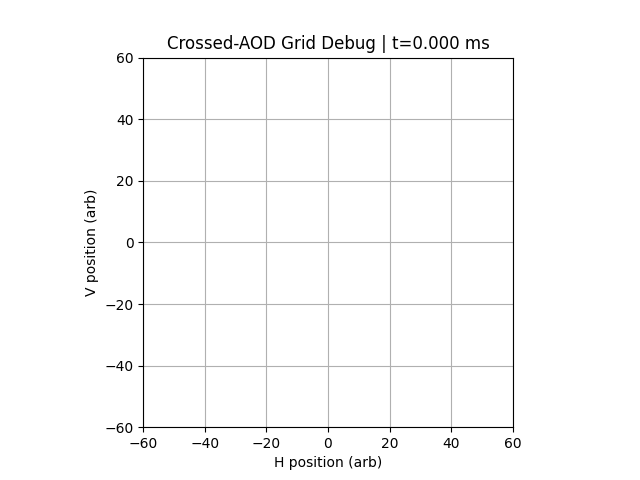

In [4]:
from awgsegmentfactory import interactive_grid_debug, LinearFreqToPos

# Optional: map frequency to "position units" for nicer axes.
fx = LinearFreqToPos(f0_hz=100e6, slope_hz_per_unit=250e3)  # e.g. µm if 250 kHz/µm
fy = LinearFreqToPos(f0_hz=100e6, slope_hz_per_unit=250e3)

fig,ax = interactive_grid_debug(
    prog,
    plane_h="H",
    plane_v="V",
    fx=fx,
    fy=fy,
    fps=300,
    annotate=False,   # turn on if you want (i,j) labels
)

In [8]:
import ipywidgets as widgets
widgets.IntSlider()


IntSlider(value=0)